In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1. Load Dataset

In this dataset, each entry represents a person who takes a credit by a bank

In [97]:
data = pd.read_csv('D:\\Bootcamp\\10. Case EDA\\german-credit-risk\\german_credit_data.csv')

In [98]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## 2. Cari tahu lebih dalam tentang data kita

1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [99]:
data.shape

(1000, 10)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [101]:
data.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [102]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## 3. Handling Missing Values

In [103]:
count_missing = data.isnull().sum()
count_missing # ada 2 kolom yang beberapa datanya missing

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [104]:
percentage = round(count_missing/len(data)*100,2)
percentage # persentase kolom yang datanya kosong

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64

### drop unused columns

In [105]:
dropped = ['Unnamed: 0']

In [106]:
data.drop(columns=dropped, inplace=True)

In [107]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### Fill the misiing values
1. Saving accounts fill with data mode karena kategorikal
2. Checking acccount fill with data mode karena kategorikal

In [108]:
features = ['Saving accounts', 'Checking account']

In [109]:
for feature in features:
    if feature in data.columns.values:
        data[feature] = data[feature].fillna(data[feature].value_counts().index[0])

In [114]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [115]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

## 4. Univariate Analysis

In [116]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [117]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### Cari tahu yuk distribusi dari umur yang mengambil credit di bank

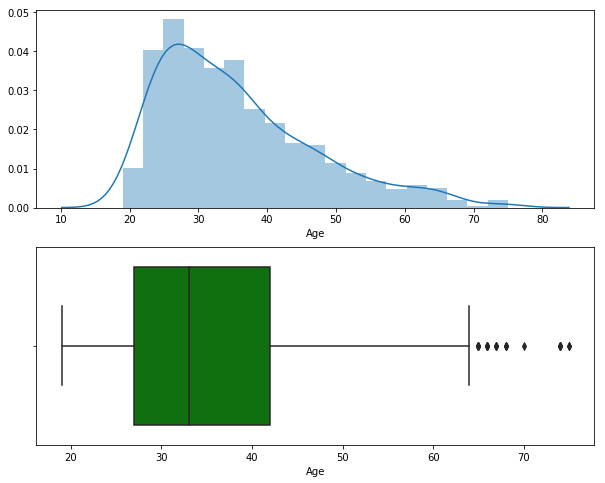

In [118]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.distplot(data['Age'])

f.add_subplot(2,1,2)
sns.boxplot(data['Age'], color='green')

1. dari 2 plot diatas dapat diambil insights bahwa sebagian besar yang mengambil kredit di bank adalah orang yang berumur diantara 27 - 42 tahun. mungkin ini adalah orang yang baru menikah dan membutuhkan pinjaman dari bank.
<br>
2. umur dibawah 20 tahun sangat sedikit yang mengambil credit karena memang mungkin mereka masih muda dan financial mereka masih disokong oleh orang tua mereka.
<br>
3. sedangkan untuk umur diatas 50 tahun juga relatif sedikit yang mengambil kredit, mungkin karena di umur ini orang sudah mapan.

### Apakah perbedaan gender berpengaruh ?

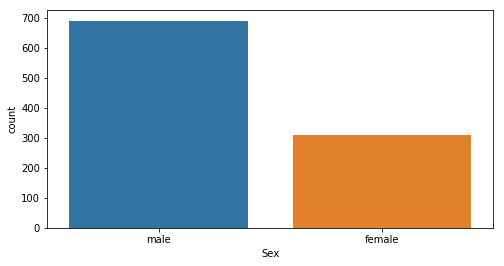

In [119]:
plt.figure(figsize=(8,4))
sns.countplot(data['Sex'])

ternyata laki laki lebih banyak mengambil kredit daripada perempuan.

### Bagaimana hubunganya dengan housing dan job ?

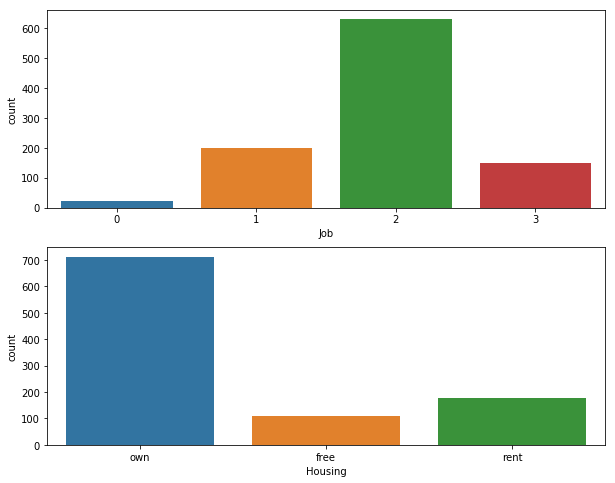

In [120]:
f = plt.figure(figsize=(10,8))

f.add_subplot(2,1,1)
sns.countplot(data['Job'])

f.add_subplot(2,1,2)
sns.countplot(data['Housing'])

dilihat dari grafik diatas:
1. ternyata paling banyak yang meminjam credit adalah yang jobnya tipe skilled dan yang sudah memiliki rumah
<br>
2. apakah memang bank hanya memberikan credit terhadap penduduk yang jobnya skilled dan memiliki rumah ? karena bank percaya mereka akan bisa mengembalikan uang pinjaman. atau hanya penduduk yang seperti di atas yang berani meminjam uang ?

### Lalu bagaimana distribusi dari jumlah pinjaman ?

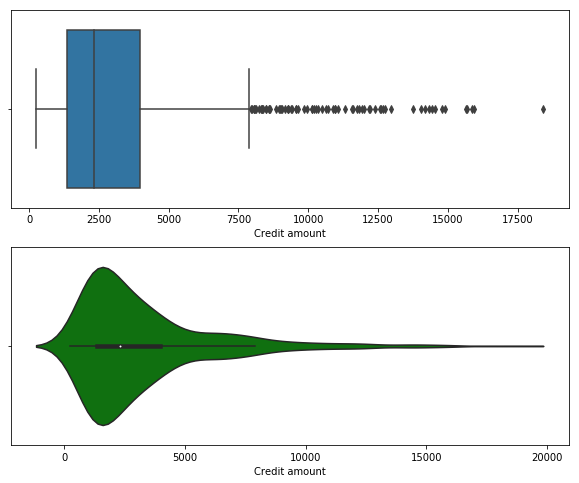

In [121]:
g = plt.figure(figsize=(10,8))

g.add_subplot(2,1,1)
sns.boxplot(data['Credit amount'])

g.add_subplot(2,1,2)
sns.violinplot(data['Credit amount'], color='green')

1. dari boxplot bisa dilihat bahwa ternyata banyak sekali data outlier.
2. dari keduaplot bisa diketahui bahwa sebagian besar orang meminjam uang dari bank dengan nilai diantara 2000 - 3800 us dollars

### Duration, saya mencernanya ini itu berapa lama orang akan melunasi creditnya

In [122]:
top_duration = data.groupby('Duration').Age.count().reset_index()
top_duration.rename(columns={'Age':'count'}, inplace=True)
top_duration = top_duration.nlargest(50, 'count')

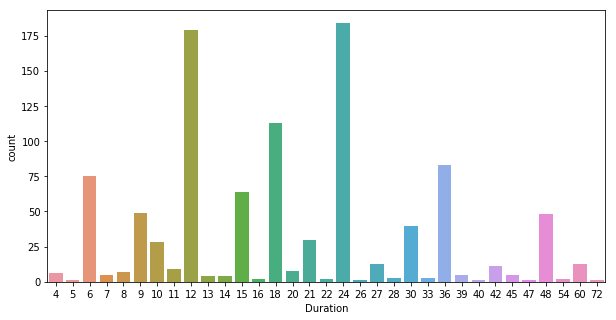

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(data=top_duration, y=top_duration['count'], x=top_duration['Duration'])

sebagian besar orang memilih untuk melunasi kredit dengan jangka waktu 24 bulan dan 12 bulan.

### Untuk apa saja mereka meminjam kredit ?

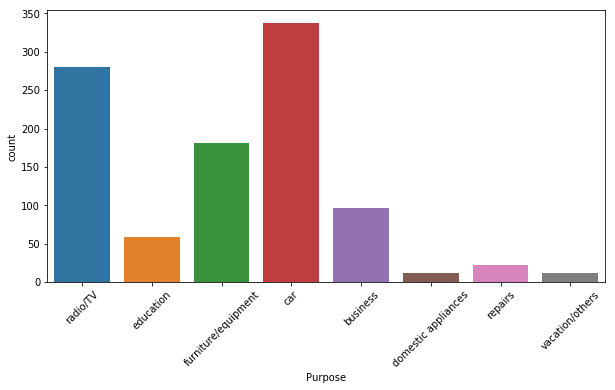

In [124]:
plt.figure(figsize=(10,5))
plot = sns.countplot(data['Purpose'])
plt.setp(plot.get_xticklabels(), rotation=45)
plt.show()

Ternyata rata-rata orang meminjam kredit untuk memenuhi kebutuhan tersier seperi membeli mobil / radio dan tv

### coba kita cari tahu tentang saving accounts dan checking accounts

In [125]:
data['Saving accounts'].unique()

array(['little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [127]:
data['Checking account'].unique()

array(['little', 'moderate', 'rich'], dtype=object)

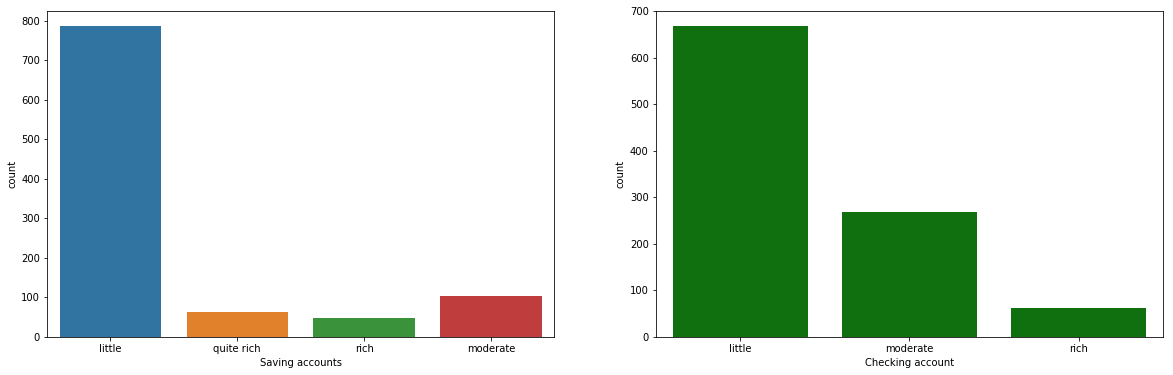

In [132]:
h = plt.figure(figsize=(20,6))

h.add_subplot(1,2,1)
sns.countplot(data['Saving accounts'])

h.add_subplot(1,2,2)
sns.countplot(data['Checking account'], color='green')

ternyata memang sebagian besar orang yang meminjam di bank adalah yang mempunya saving and checking account yang sedikit

## 5. Bivariate Analysis

In [133]:
data.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

### Mengubah data kategorikal ke numerikal dengan label encoder

In [134]:
kategorikal = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [135]:
data2 = data.copy()

In [137]:
for feature in kategorikal:
    if feature in data2.columns.values:
        data2[feature] = LabelEncoder().fit_transform(data2[feature])

In [139]:
data2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


### Korelasi plot

In [144]:
data2[kategorikal].corr(method='spearman').style.background_gradient().set_precision(2) #untuk data kategorik

,Sex,Housing,Saving accounts,Checking account,Purpose
Sex,1,-0.22,-0.006,-0.014,-0.055
Housing,-0.22,1,0.045,-0.023,0.0087
Saving accounts,-0.006,0.045,1,0.049,-0.032
Checking account,-0.014,-0.023,0.049,1,0.0098
Purpose,-0.055,0.0087,-0.032,0.0098,1


In [146]:
data.corr(method='pearson').style.background_gradient().set_precision(2) #untuk data numerikal

,Age,Job,Credit amount,Duration
Age,1,0.016,0.033,-0.036
Job,0.016,1,0.29,0.21
Credit amount,0.033,0.29,1,0.62
Duration,-0.036,0.21,0.62,1


In [148]:
data2.corr(method='pearson').style.background_gradient().set_precision(2) #untuk semua data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Age,1,0.16,0.016,-0.3,0.016,-0.027,0.033,-0.036,-0.074
Sex,0.16,1,0.07,-0.22,-0.014,-0.013,0.093,0.081,-0.063
Job,0.016,0.07,1,-0.11,-0.035,-0.043,0.29,0.21,-0.025
Housing,-0.3,-0.22,-0.11,1,0.043,-0.028,-0.14,-0.16,0.021
Saving accounts,0.016,-0.014,-0.035,0.043,1,0.016,-0.078,-0.043,-0.025
Checking account,-0.027,-0.013,-0.043,-0.028,0.016,1,0.007,0.0042,0.019
Credit amount,0.033,0.093,0.29,-0.14,-0.078,0.007,1,0.62,-0.15
Duration,-0.036,0.081,0.21,-0.16,-0.043,0.0042,0.62,1,-0.083
Purpose,-0.074,-0.063,-0.025,0.021,-0.025,0.019,-0.15,-0.083,1


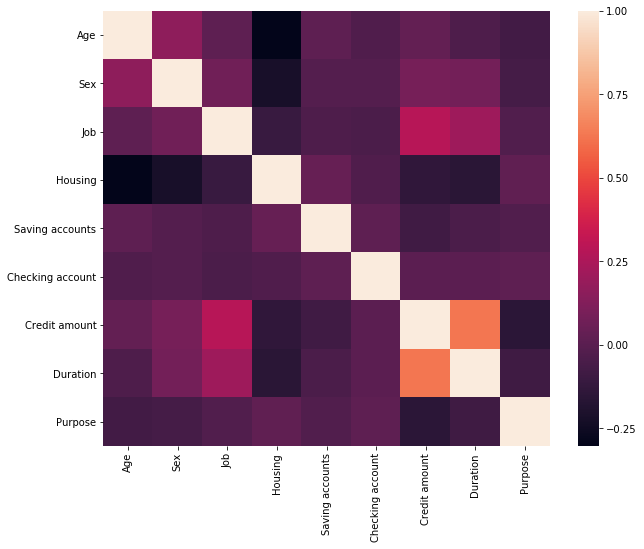

In [166]:
plt.figure(figsize=(10,8))
sns.heatmap(data2.corr(method='pearson'))

### Hubungan antara Job dengan Credit Amount, Job dengan Duration

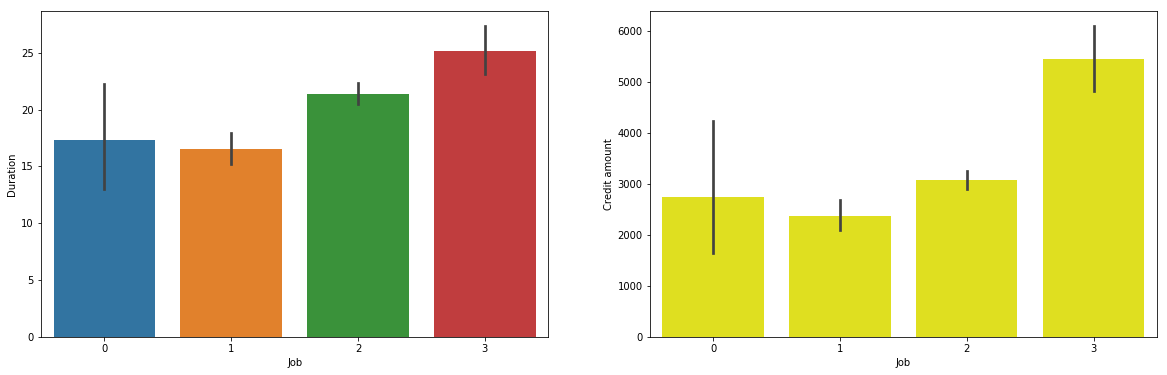

In [162]:
i = plt.figure(figsize=(20,6))

i.add_subplot(1,2,1)
sns.barplot(data['Job'], data['Duration'])

i.add_subplot(1,2,2)
sns.barplot(data['Job'], data['Credit amount'], color='yellow')

1. ternyata ada korelasi positif tetapi tidak terlalu kuat antara job dengan durasi pinjam dan job dengan jumlah kredit yang dipinjam.
2. jadi dengan bertambahnya nilai job atau semakin skillfull orang maka dia berani untuk meminjam kredit lebih besar

### Hubungan antara Duration dengan Credit Amount, Purpose dengan Credit amount, Housing dengan credit amount

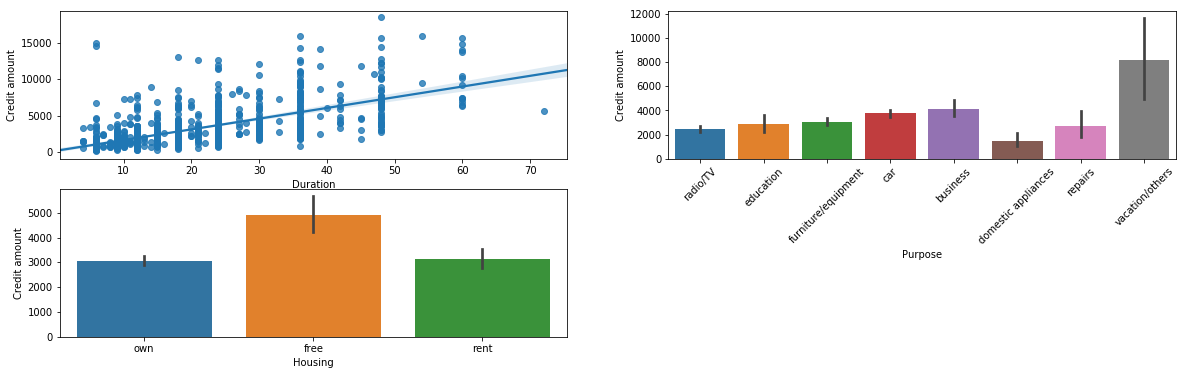

In [159]:
j = plt.figure(figsize=(20,6))

j.add_subplot(2,2,1)
sns.regplot(data['Duration'], data['Credit amount'])

j.add_subplot(2,2,2)
plot = sns.barplot(data['Purpose'], data['Credit amount'])
plt.setp(plot.get_xticklabels(), rotation=45)

j.add_subplot(2,2,3)
sns.barplot(data['Housing'], data['Credit amount'])

plt.show()
f.tight_layout()

1. untuk korelasi antara duration dengan credit amount adalah positif yang kuat. dimana dengan bertambahnya durasi pengembalian kredit maka orang akan lebih berani untuk meminjam kredit yang lebih besar
2. ternyata walaupun banyak orang yang meminjam kredit untuk vacation, namun rata-rata jumlah kredit untuk vacation adalah yang terbesar. jadi ada kemungkinan bahwa per orang berani meminjam lebih besar kredit untuk vacation
3. untuk yang memiliki rumah, semakin dia memiliki rumah maka semakin kecil pula rata-rata uang yang mereka pinjam

### Hubungan antara usia dengan gender, gender dengan credit amount, gender dengan duration

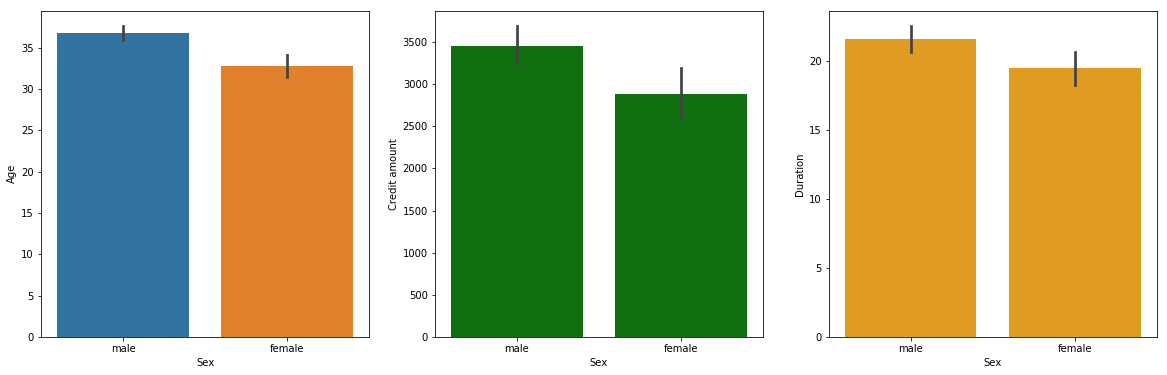

In [163]:
k = plt.figure(figsize=(20,6))

k.add_subplot(1,3,1)
sns.barplot(data['Sex'], data['Age'])

k.add_subplot(1,3,2)
sns.barplot(data['Sex'], data['Credit amount'], color='green')

k.add_subplot(1,3,3)
sns.barplot(data['Sex'], data['Duration'], color='orange')

dari 3 grafik diatas dapat ditarik insight:
1. sebagian besar laki-laki yang meminjam kredit lebih tua daripada dengan wanita.
2. laki laki lebih berani untuk meminjam kredit lebih banyak daripada perempuan
3. durasi peminjaman rata-rata oleh laki-laki lebih lama daripada wanita
<br>
sepertinya laki-laki lebih berani dari wanita yak

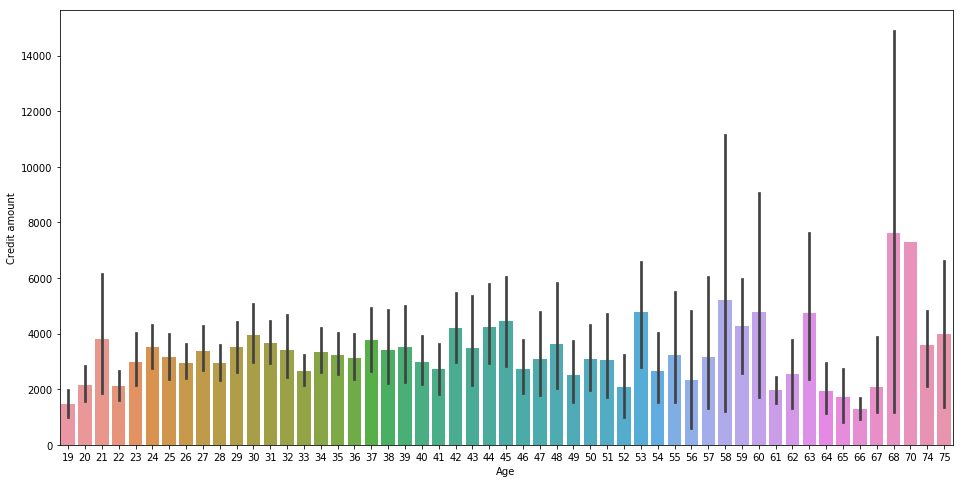

In [172]:
plt.figure(figsize=(16,8))
sns.barplot(data['Age'], data['Credit amount'])

dapat dilihat bahwa memang sebagian besar kelompok umur meminjam uangnya dibawah 4000 us dollars